**Import Needed Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

**First things First**

Import needed tables from associated CSV files. According to the data dictionary, many of these have a field in common, "PlanID"

In [2]:
business_rules = pd.read_csv('BusinessRules.csv')
benefits_cost_sharing = pd.read_csv('BenefitsCostSharing.csv', low_memory=False)
crosswalk_2015 = pd.read_csv('Crosswalk2015.csv', low_memory=False)
crosswalk_2016 = pd.read_csv('Crosswalk2016.csv', low_memory=False)
network = pd.read_csv('Network.csv')
plan_attributes = pd.read_csv('PlanAttributes.csv', low_memory=False)
rate = pd.read_csv('Rate.csv', low_memory=False)
service_area = pd.read_csv('ServiceArea.csv', low_memory=False)

**Inspect these tables to identify fields and determine completeness & usefulness of data**

In general, .info() provides the needed information on column names, completeness, and shape, though there are too many columns for this to work in Plan Attributes

In [3]:
business_rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21085 entries, 0 to 21084
Data columns (total 23 columns):
BusinessYear                             21085 non-null int64
StateCode                                21085 non-null object
IssuerId                                 21085 non-null int64
SourceName                               21085 non-null object
VersionNum                               21085 non-null int64
ImportDate                               21085 non-null object
IssuerId2                                21085 non-null int64
TIN                                      21085 non-null object
ProductId                                19402 non-null object
StandardComponentId                      20073 non-null object
EnrolleeContractRateDeterminationRule    20838 non-null object
TwoParentFamilyMaxDependentsRule         20546 non-null object
SingleParentFamilyMaxDependentsRule      20546 non-null object
DependentMaximumAgRule                   20902 non-null object
ChildrenOnlyC

In [4]:
benefits_cost_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5048408 entries, 0 to 5048407
Data columns (total 32 columns):
BenefitName            object
BusinessYear           int64
CoinsInnTier1          object
CoinsInnTier2          object
CoinsOutofNet          object
CopayInnTier1          object
CopayInnTier2          object
CopayOutofNet          object
EHBVarReason           object
Exclusions             object
Explanation            object
ImportDate             object
IsCovered              object
IsEHB                  object
IsExclFromInnMOOP      object
IsExclFromOonMOOP      object
IsStateMandate         object
IsSubjToDedTier1       object
IsSubjToDedTier2       object
IssuerId               int64
IssuerId2              int64
LimitQty               float64
LimitUnit              object
MinimumStay            float64
PlanId                 object
QuantLimitOnSvc        object
RowNumber              int64
SourceName             object
StandardComponentId    object
StateCode          

In [5]:
#Didn't return our non-null values. We can work around that 
print(((benefits_cost_sharing.isnull() == False).sum()).to_string)

<bound method Series.to_string of BenefitName            5048408
BusinessYear           5048408
CoinsInnTier1          3934561
CoinsInnTier2           476821
CoinsOutofNet          3934561
CopayInnTier1          3934561
CopayInnTier2           476821
CopayOutofNet          3934559
EHBVarReason           2027671
Exclusions              476161
Explanation             972708
ImportDate             5048408
IsCovered              4832428
IsEHB                  3231046
IsExclFromInnMOOP      4064422
IsExclFromOonMOOP      4065782
IsStateMandate          797945
IsSubjToDedTier1       2582531
IsSubjToDedTier2       2582354
IssuerId               5048408
IssuerId2              5048408
LimitQty                687683
LimitUnit               687869
MinimumStay              16727
PlanId                 5048408
QuantLimitOnSvc        1783876
RowNumber              5048408
SourceName             5048408
StandardComponentId    5048408
StateCode              5048408
StateCode2             5048408
Versi

In [6]:
crosswalk_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132505 entries, 0 to 132504
Data columns (total 21 columns):
State                        132505 non-null object
DentalPlan                   132505 non-null object
PlanID_2014                  132505 non-null object
IssuerID_2014                132505 non-null int64
MultistatePlan_2014          132505 non-null object
MetalLevel_2014              132505 non-null object
ChildAdultOnly_2014          132505 non-null int64
FIPSCode                     132505 non-null int64
ZipCode                      132505 non-null int64
CrosswalkLevel               132505 non-null int64
ReasonForCrosswalk           132505 non-null int64
PlanID_2015                  132505 non-null object
IssuerID_2015                132505 non-null int64
MultistatePlan_2015          132505 non-null object
MetalLevel_2015              132505 non-null object
ChildAdultOnly_2015          132505 non-null object
AgeOffPlanID_2015            132505 non-null object
IssuerID_Age

In [7]:
crosswalk_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150005 entries, 0 to 150004
Data columns (total 21 columns):
State                        150005 non-null object
DentalPlan                   150005 non-null object
PlanID_2015                  150005 non-null object
IssuerID_2015                150005 non-null int64
MultistatePlan_2015          150005 non-null object
MetalLevel_2015              150005 non-null object
ChildAdultOnly_2015          150005 non-null int64
FIPSCode                     150005 non-null int64
ZipCode                      150005 non-null int64
CrosswalkLevel               150005 non-null int64
ReasonForCrosswalk           150005 non-null int64
PlanID_2016                  150005 non-null object
IssuerID_2016                150005 non-null int64
MultistatePlan_2016          150005 non-null object
MetalLevel_2016              150005 non-null object
ChildAdultOnly_2016          150005 non-null object
AgeOffPlanID_2016            150005 non-null object
IssuerID_Age

In [8]:
network.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3822 entries, 0 to 3821
Data columns (total 14 columns):
BusinessYear      3822 non-null int64
StateCode         3822 non-null object
IssuerId          3822 non-null int64
SourceName        3822 non-null object
VersionNum        3822 non-null int64
ImportDate        3822 non-null object
IssuerId2         3822 non-null int64
StateCode2        3822 non-null object
NetworkName       3822 non-null object
NetworkId         3822 non-null object
NetworkURL        3822 non-null object
RowNumber         3822 non-null int64
MarketCoverage    1867 non-null object
DentalOnlyPlan    1867 non-null object
dtypes: int64(5), object(9)
memory usage: 418.1+ KB


In [9]:
rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12694445 entries, 0 to 12694444
Data columns (total 24 columns):
BusinessYear                                 int64
StateCode                                    object
IssuerId                                     int64
SourceName                                   object
VersionNum                                   int64
ImportDate                                   object
IssuerId2                                    int64
FederalTIN                                   object
RateEffectiveDate                            object
RateExpirationDate                           object
PlanId                                       object
RatingAreaId                                 object
Tobacco                                      object
Age                                          object
IndividualRate                               float64
IndividualTobaccoRate                        float64
Couple                                       float64
Pr

In [10]:
#count fill rate under 'rate'
print(((rate.isnull() == False).sum()).to_string)

<bound method Series.to_string of BusinessYear                                 12694445
StateCode                                    12694445
IssuerId                                     12694445
SourceName                                   12694445
VersionNum                                   12694445
ImportDate                                   12694445
IssuerId2                                    12694445
FederalTIN                                   12694445
RateEffectiveDate                            12694445
RateExpirationDate                           12694445
PlanId                                       12694445
RatingAreaId                                 12694445
Tobacco                                      12694445
Age                                          12694445
IndividualRate                               12694445
IndividualTobaccoRate                         4932349
Couple                                          40941
PrimarySubscriberAndOneDependent                

In [11]:
service_area.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42247 entries, 0 to 42246
Data columns (total 18 columns):
BusinessYear                  42247 non-null int64
StateCode                     42247 non-null object
IssuerId                      42247 non-null int64
SourceName                    42247 non-null object
VersionNum                    42247 non-null int64
ImportDate                    42247 non-null object
IssuerId2                     42247 non-null int64
StateCode2                    42247 non-null object
ServiceAreaId                 42247 non-null object
ServiceAreaName               42247 non-null object
CoverEntireState              42247 non-null object
County                        40452 non-null float64
PartialCounty                 40452 non-null object
ZipCodes                      616 non-null object
PartialCountyJustification    616 non-null object
RowNumber                     42247 non-null int64
MarketCoverage                22322 non-null object
DentalOnlyPlan 

***plan attributes*** - 
Handling plan attributes a little differently. Gathering shape and summary info on columns with .info(), then looking at columns and nulls by summing the columns with values. 

In [12]:
plan_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77353 entries, 0 to 77352
Columns: 176 entries, AVCalculatorOutputNumber to WellnessProgramOffered
dtypes: float64(7), int64(9), object(160)
memory usage: 103.9+ MB


In [13]:
print(((plan_attributes.isnull() == False).sum()).to_string())

AVCalculatorOutputNumber                                        54528
BeginPrimaryCareCostSharingAfterNumberOfVisits                  77353
BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays        77353
BenefitPackageId                                                77353
BusinessYear                                                    77353
CSRVariationType                                                77353
ChildOnlyOffering                                               77353
ChildOnlyPlanId                                                   437
CompositeRatingOffered                                          27381
DEHBCombInnOonFamilyMOOP                                          928
DEHBCombInnOonFamilyPerGroupMOOP                                  223
DEHBCombInnOonFamilyPerPersonMOOP                                 223
DEHBCombInnOonIndividualMOOP                                     1151
DEHBDedCombInnOonFamily                                         18673
DEHBDedCombInnOonFam

In each instance that it's present, PlanId has filled values across the entire data set. It is likely a good link between these tables depending on which direction we want to take the analysis.

In this set, there's enough data to look at plans across states and by counties. County data may be granular enough to give us meaningful insights into demographic differences in coverage types and rates. First, we need to intake the FIPS county identifier

In [14]:
fips_match = pd.read_csv('national_county_csv.csv')

In [15]:
#needs to be converted to a format that works for the FIPS data provided (XXXXX)
fips_match.head(10)

,State,State Code,County Code,County Name
0,AL,1,1,Autauga County
1,AL,1,3,Baldwin County
2,AL,1,5,Barbour County
3,AL,1,7,Bibb County
4,AL,1,9,Blount County
5,AL,1,11,Bullock County
6,AL,1,13,Butler County
7,AL,1,15,Calhoun County
8,AL,1,17,Chambers County
9,AL,1,19,Cherokee County


In [16]:
fips_match['State Code'] = fips_match['State Code'].astype(str) 
fips_match['County Code'] = fips_match['County Code'].astype(str)

In [17]:
fips_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3235 entries, 0 to 3234
Data columns (total 4 columns):
State          3235 non-null object
State Code     3235 non-null object
County Code    3235 non-null object
County Name    3235 non-null object
dtypes: object(4)
memory usage: 101.2+ KB


In [18]:
fips_match.loc[fips_match['State Code'].astype(int) < 10, 'State Code'] = str(0) + fips_match.loc[fips_match['State Code'].astype(int) < 10, 'State Code']

In [19]:
fips_match.loc[fips_match['County Code'].astype(int) < 10, 'County Code'] = '00' + fips_match.loc[fips_match['County Code'].astype(int) < 10, 'County Code']

In [20]:
fips_match.loc[(fips_match['County Code'].astype(int) > 9) & (fips_match['County Code'].astype(int) < 100), 'County Code' ] = '0' + fips_match.loc[(fips_match['County Code'].astype(int) > 9) &(fips_match['County Code'].astype(int) < 100), 'County Code']

In [21]:
fips_match['County'] = (fips_match['State Code'].astype(str) + fips_match['County Code'].astype(str)).astype(float)

In [22]:
fips_match.loc[fips_match['County'] == 54107]

,State,State Code,County Code,County Name,County
3046,WV,54,107,Wood County,54107.0


In [23]:
service_area = service_area.rename(columns={'County': 'fips_match'})

In [24]:
crosswalk_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150005 entries, 0 to 150004
Data columns (total 21 columns):
State                        150005 non-null object
DentalPlan                   150005 non-null object
PlanID_2015                  150005 non-null object
IssuerID_2015                150005 non-null int64
MultistatePlan_2015          150005 non-null object
MetalLevel_2015              150005 non-null object
ChildAdultOnly_2015          150005 non-null int64
FIPSCode                     150005 non-null int64
ZipCode                      150005 non-null int64
CrosswalkLevel               150005 non-null int64
ReasonForCrosswalk           150005 non-null int64
PlanID_2016                  150005 non-null object
IssuerID_2016                150005 non-null int64
MultistatePlan_2016          150005 non-null object
MetalLevel_2016              150005 non-null object
ChildAdultOnly_2016          150005 non-null object
AgeOffPlanID_2016            150005 non-null object
IssuerID_Age

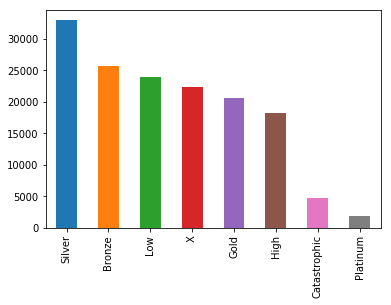

In [30]:
crosswalk_2016['MetalLevel_2016'].value_counts().plot(kind='bar')

In [31]:
crosswalk_2016.describe()

,IssuerID_2015,ChildAdultOnly_2015,FIPSCode,ZipCode,CrosswalkLevel,ReasonForCrosswalk,IssuerID_2016,IssuerID_AgeOff2016
count,150005.000000,150005.000000,150005.000000,150005.000000,150005.000000,150005.000000,150005.000000,150005.000000
mean,50636.687077,0.106236,32872.501050,98.404407,0.910756,1.738949,42315.705063,3708.211733
std,27004.063904,0.331165,14992.714918,2091.765662,1.311949,2.298106,30692.125835,15416.226297
min,10091.000000,0.000000,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28348.000000,0.000000,19069.000000,0.000000,0.000000,0.000000,17575.000000,0.000000
50%,45550.000000,0.000000,37025.000000,0.000000,0.000000,0.000000,36096.000000,0.000000
75%,72299.000000,0.000000,47119.000000,0.000000,1.000000,5.000000,68781.000000,0.000000
max,99969.000000,2.000000,56045.000000,49285.000000,5.000000,6.000000,99969.000000,99969.000000


In [32]:
crosswalk_2016.corr()

,IssuerID_2015,ChildAdultOnly_2015,FIPSCode,ZipCode,CrosswalkLevel,ReasonForCrosswalk,IssuerID_2016,IssuerID_AgeOff2016
IssuerID_2015,1.000000,0.084927,-0.044501,-0.020089,0.043430,0.120652,0.683230,0.150383
ChildAdultOnly_2015,0.084927,1.000000,0.024971,0.026398,-0.007684,-0.082418,0.121448,0.382708
FIPSCode,-0.044501,0.024971,1.000000,-0.008788,0.023030,-0.032986,-0.076338,0.016164
ZipCode,-0.020089,0.026398,-0.008788,1.000000,0.074916,0.018514,-0.022268,-0.011316
CrosswalkLevel,0.043430,-0.007684,0.023030,0.074916,1.000000,0.686347,-0.432248,-0.106626
ReasonForCrosswalk,0.120652,-0.082418,-0.032986,0.018514,0.686347,1.000000,-0.275957,-0.124388
IssuerID_2016,0.683230,0.121448,-0.076338,-0.022268,-0.432248,-0.275957,1.000000,0.199710
IssuerID_AgeOff2016,0.150383,0.382708,0.016164,-0.011316,-0.106626,-0.124388,0.199710,1.000000


In [33]:
crosswalk_2016.head()

,State,DentalPlan,PlanID_2015,IssuerID_2015,MultistatePlan_2015,MetalLevel_2015,ChildAdultOnly_2015,FIPSCode,ZipCode,CrosswalkLevel,ReasonForCrosswalk,PlanID_2016,IssuerID_2016,MultistatePlan_2016,MetalLevel_2016,ChildAdultOnly_2016,AgeOffPlanID_2016,IssuerID_AgeOff2016,MultistatePlan_AgeOff2016,MetalLevel_AgeOff2016,ChildAdultOnly_AgeOff2016
0,OR,N,10091OR0360004,10091,N,Bronze,0,41021,0,0,0,10091OR0360004,10091,N,Bronze,0,00000XX0000000,0,X,X,X
1,OR,N,10091OR0360004,10091,N,Bronze,0,41037,0,0,0,10091OR0360004,10091,N,Bronze,0,00000XX0000000,0,X,X,X
2,OR,N,10091OR0360004,10091,N,Bronze,0,41009,0,0,0,10091OR0360004,10091,N,Bronze,0,00000XX0000000,0,X,X,X
3,OR,N,10091OR0360004,10091,N,Bronze,0,41023,0,0,0,10091OR0360004,10091,N,Bronze,0,00000XX0000000,0,X,X,X
4,OR,N,10091OR0360004,10091,N,Bronze,0,41059,0,0,0,10091OR0360004,10091,N,Bronze,0,00000XX0000000,0,X,X,X


The crosswalk 2016 dataset specifically provides a good subset of information we can use to start looking at ethnographic differences in the application of insurance plans. I suspect there may be relationships between the plan metal tier and the county in question. The data provides FIPS codes for counties, which I've combined with a more general FIPS code tracking dataset. This provides the ability to match against census data that may be divided by ZIP or County, as we can either match by county or roll zip codes into a county using other data. The final project will experiment with various classification techniques to assess various aspects of demographic makeup, such as race, with the data provided.